House Price  Prediction Model


Importing Required Library

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Load the dataset

In [35]:
df = pd.read_csv('housing.csv')

Explore the dataset

In [36]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [38]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Handle Missing values

In [39]:
df.dropna(inplace=True)
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Encode Categorical Variables

In [40]:
ocean_proximity_dummies = pd.get_dummies(df['ocean_proximity']).astype(int)
df = df.join(ocean_proximity_dummies)
df.drop(columns=['ocean_proximity'], inplace=True)

Explore correlations

<Axes: >

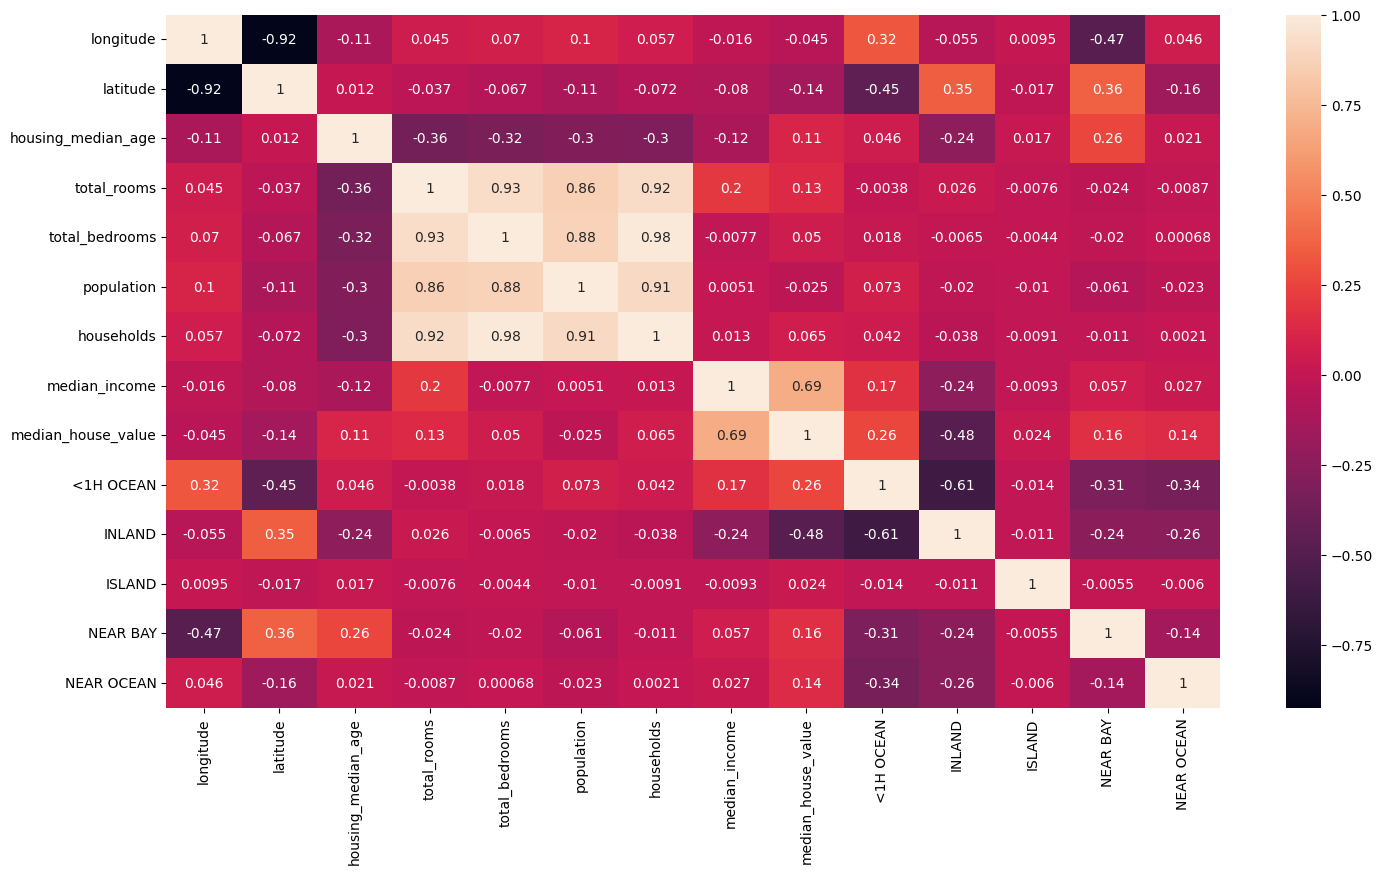

In [41]:
plt.figure(figsize=(17,9))
sns.heatmap(df.corr(), annot=True)

Transform Variables

In [42]:
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)


Create new features

In [43]:
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
df['household_rooms'] = df['total_rooms'] / df['households']

Split data into training and testing sets

In [44]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45)


Train linear regression model

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Linear Regression Train Score:", lr.score(X_train, y_train))

Linear Regression Train Score: 0.6746314823264463


Train random forest regressor model

In [46]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print("Random Forest Regressor Train Score:", rfr.score(X_train, y_train))
print("Random Forest Regressor Test Score:", rfr.score(X_test, y_test))

Random Forest Regressor Train Score: 0.9730767653450964
Random Forest Regressor Test Score: 0.7981629877997967


Make a prediction

In [47]:
pred = rfr.predict([[-112.23, 57.88, 43.0, 6.781058, 6.867534, 4.777652, 2.844187, 7.3252, 0, 1, 1, 0, 0, 0.627813, 1.399834]])
print("Predicted Median House Value:", pred)

Predicted Median House Value: [269638.02]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
